In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("airline-passenger-traffic.csv", header=None)
data.columns = ["Month", "Passengers"]
data["Month"] = pd.to_datetime(data["Month"], format="%Y-%m")
data = data.set_index("Month")
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


In [4]:
data.shape

(144, 1)

## Time Series Analysis

## Plot time series data

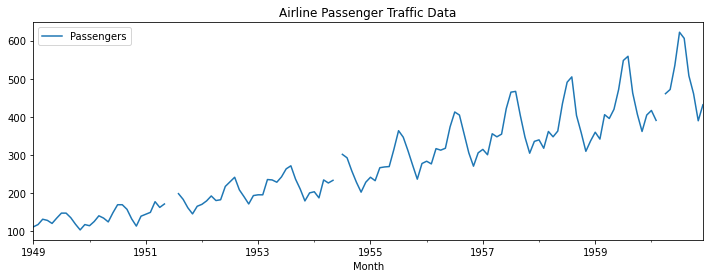

In [5]:
data.plot(figsize=([12,4]))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic Data')
plt.show()

## Missing Value Treatment

### Mean Imputation

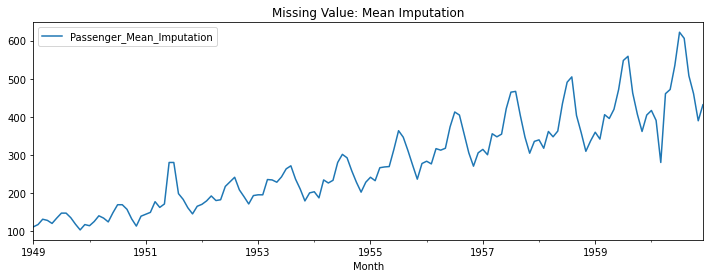

In [6]:
# help(data.assign)
data = data.assign(Passenger_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data[["Passenger_Mean_Imputation"]].plot(figsize=(12,4))
plt.title('Missing Value: Mean Imputation')
plt.show()

### Linear Interpolation

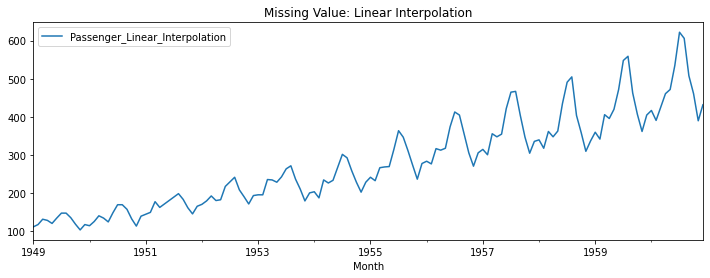

In [7]:
data = data.assign(Passenger_Linear_Interpolation=data.Passengers.interpolate(method='linear'))
data[["Passenger_Linear_Interpolation"]].plot(figsize=[12,4])
plt.legend(loc='best')
plt.title("Missing Value: Linear Interpolation")
plt.show()

#### Use linear interpolate to impute missing values

In [8]:
data["Passengers"] = data["Passenger_Linear_Interpolation"]

### Detecting Outliers

#### Boxplot

In [10]:
import seaborn as sns

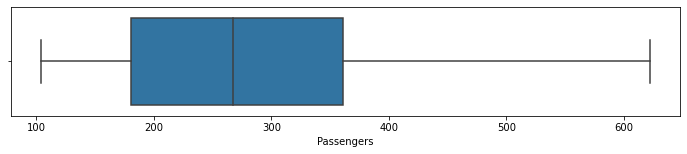

In [13]:
fig = plt.subplots(figsize=([12,2]))
ax = sns.boxplot(x=data["Passengers"], whis=1.5)

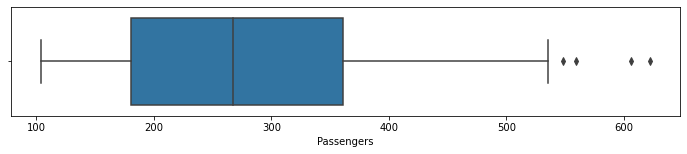

In [14]:
fig = plt.subplots(figsize=([12,2]))
ax = sns.boxplot(x=data["Passengers"], whis=1)

#### Histogram Plot

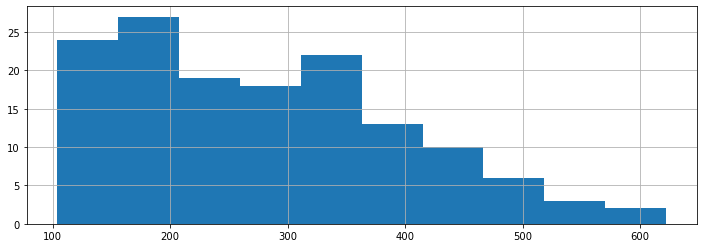

In [17]:
fig = data.Passengers.hist(figsize=([12,4]))

No outliers detected in the data.